In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split

tit_train = pd.read_csv("ed-titanic-training.csv", index_col=0)
tit_test = pd.read_csv("ed-titanic-test.csv", index_col=0)

tit_train.loc[tit_train['Age'] > 3, 'Age'] = 4
tit_test.loc[tit_test['Age'] > 3, 'Age'] = 4

tit_data_x = tit_train.drop('Survived', axis=1)
tit_data_y = tit_train['Survived']

tit_x_train, tit_x_test, tit_y_train, tit_y_test = train_test_split(tit_data_x, tit_data_y, train_size=0.75)

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

search = GridSearchCV(
    RandomForestClassifier(),
    {
        'criterion': ['entropy'],
        'max_depth': [3],
        'min_samples_leaf': [1],
        'n_estimators': [50, 75, 100, 125, 150]
    },
    cv=10,
    scoring='accuracy'
)

search.fit(tit_data_x, tit_data_y)
print(search.best_estimator_.n_estimators)

100


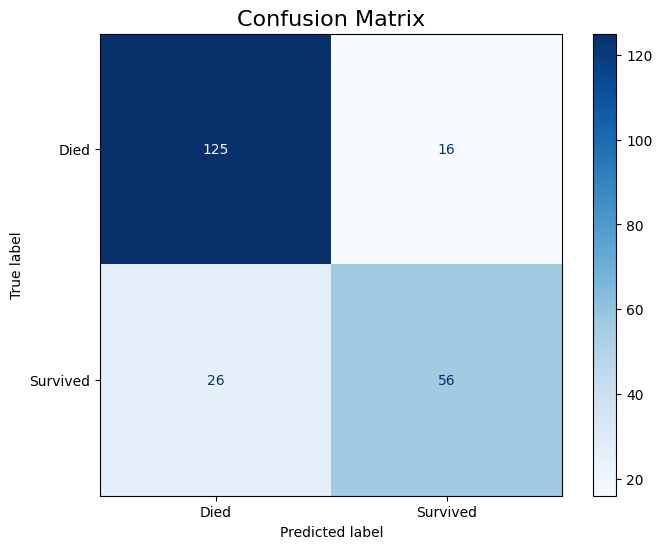

In [41]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

decision_tree = RandomForestClassifier(n_estimators=75, max_depth=3, criterion='entropy', min_samples_leaf=1)
decision_tree.fit(tit_x_train, tit_y_train)

tit_y_pred = decision_tree.predict(tit_x_test)
cm = confusion_matrix(tit_y_test, tit_y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Died', 'Survived'])
fig, diag = plt.subplots(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues, ax=diag)
diag.set_title('Confusion Matrix', fontsize=16)
plt.show()

In [42]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_recall_fscore_support

accuracy = accuracy_score(tit_y_test, tit_y_pred)
print(f'Accuracy: {accuracy:.3f}')

f1_sc = f1_score(tit_y_test, tit_y_pred)
print(f'F1-score: {f1_sc:.3f}')

precision_avg, recall_avg, _, _ = precision_recall_fscore_support(tit_y_test, tit_y_pred, average='weighted')
print(f'Avg Precision: {precision_avg:.3f}')
print(f'Avg Recall: {recall_avg:.3f}')

Accuracy: 0.812
F1-score: 0.727
Avg Precision: 0.809
Avg Recall: 0.812


In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import numpy as np

def find_best(data, target):
    comparison = GridSearchCV(
        RandomForestClassifier(),
        {
            'criterion': ['gini', 'entropy'],
            'max_depth': np.arange(1, 10),
            'min_samples_leaf': [1, 5, 10, 15],
            'n_estimators': [50, 75, 100, 125, 150]
        },
        cv=10,
        scoring='accuracy'
    )

    comparison.fit(data, target)
    print(f'Best: Gini/Entropy:{comparison.best_estimator_.criterion}, max_depth:{comparison.best_estimator_.max_depth}, min_samples_leaf:{comparison.best_estimator_.min_samples_leaf}, n_estimators:{comparison.best_estimator_.n_estimators}')

find_best(tit_data_x, tit_data_y)

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

decision_tree = RandomForestClassifier(n_estimators=125, max_depth=7, criterion='entropy', min_samples_leaf=5)
decision_tree.fit(tit_x_train, tit_y_train)

tit_y_pred = decision_tree.predict(tit_x_test)
cm = confusion_matrix(tit_y_test, tit_y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Died', 'Survived'])
fig, diag = plt.subplots(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues, ax=diag)
diag.set_title('Confusion Matrix', fontsize=16)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_recall_fscore_support

accuracy = accuracy_score(tit_y_test, tit_y_pred)
print(f'Accuracy: {accuracy:.3f}')

f1_sc = f1_score(tit_y_test, tit_y_pred)
print(f'F1-score: {f1_sc:.3f}')

precision_avg, recall_avg, _, _ = precision_recall_fscore_support(tit_y_test, tit_y_pred, average='weighted')
print(f'Avg Precision: {precision_avg:.3f}')
print(f'Avg Recall: {recall_avg:.3f}')

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA

bc = load_breast_cancer()
bc_data = bc.data
bc_target = bc.target

pca = PCA(n_components=10)
bc_pca = pca.fit_transform(bc_data)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import numpy as np

def plot_comparison(data, data_pca, target):
    accuracies = []
    params = []

    comparison = GridSearchCV(
        RandomForestClassifier(),
        {
            'criterion': ['gini', 'entropy'],
            'max_depth': np.arange(1, 10),
            'n_estimators': [50, 75, 100, 125, 150]
        },
        cv=10,
        scoring='accuracy'
    )
    

    comparison.fit(data, target)
    accuracies_no_pca = np.array(comparison.cv_results_['mean_test_score'])
    print(f'Best without PCA: Gini/Entropy:{comparison.best_estimator_.criterion}, max_depth:{comparison.best_estimator_.max_depth}, n_estimators:{comparison.best_estimator_.n_estimators}, accuracy:{max(comparison.cv_results_['mean_test_score'])}')
    params_no_pca = np.array(list(map(lambda t: [0 if t['criterion'] == 'gini' else 1, t['max_depth'], t['n_estimators']], comparison.cv_results_['params'])))
    

    comparison.fit(data_pca, target)
    accuracies_pca = np.array(comparison.cv_results_['mean_test_score'])
    print(f'Best PCA: Gini/Entropy:{comparison.best_estimator_.criterion}, max_depth:{comparison.best_estimator_.max_depth}, n_estimators:{comparison.best_estimator_.n_estimators}, accuracy:{max(comparison.cv_results_['mean_test_score'])}')
    params_pca = np.array(list(map(lambda t: [2 if t['criterion'] == 'gini' else 3, t['max_depth'], t['n_estimators']], comparison.cv_results_['params'])))

    accuracies = np.concatenate((accuracies_no_pca,accuracies_pca),axis=0)
    params = np.concatenate((params_no_pca,params_pca),axis=0)

    fig = plt.figure(figsize=(8, 8))
    points = fig.add_subplot(111, projection='3d')

    points.scatter(params[:, 0], params[:, 1], params[:, 2], c=accuracies, cmap='coolwarm', s=50)
    points.set_xlabel('Podział: 0=gini, 1=entropy, 2=PCA_gini, 3=PCA_entropy'),
    points.set_ylabel('Maksymalna głębokość')
    points.set_zlabel('Ilość drzew')
    points.set_title('Dokładność klasyfikacji względem parametrów')

    cbar = plt.colorbar(points.collections[0], ax=points, orientation='horizontal')
    cbar.set_label('Skala dokładności klasyfikacji')
    

    plt.show()
    print(f'Best: Gini/Entropy:{comparison.best_estimator_.criterion}, max_depth:{comparison.best_estimator_.max_depth}, n_estimators:{comparison.best_estimator_.n_estimators}')

plot_comparison(bc_data, bc_pca, bc_target)